In [820]:
# imports relevant modules/packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

Read in the hourlywagedata.csv.

This dataset contains information about the hourly wage paid to employees who work in a hospital, along with their position, age, and number of years worked.
Position: 0 = "Hospital"
1 = "Office"
Agerange : 1 = "18-30"
2 = "31-45"
3 = "46-65"
Yrsscale: 1 = "5 or less"
2 = "6-10"
3 = "11-15"
4 = "16-20"
5 = "21-35"
6 = "36 or more"

In [821]:
df = pd.read_csv('hourlywagedata.csv') # Loads the dataset
df

,position,agerange,yrsscale,hourwage
0,1,1,2,13.736234054538
1,0,1,2,16.4407309689108
2,0,1,3,21.3891077239505
3,1,1,1,11.377187468408
4,0,1,3,21.5607775454338
...,...,...,...,...
2995,0,3,4,20.4198852740072
2996,0,3,4,20.4414824085212
2997,1,3,4,18.4502340056492
2998,0,3,4,19.1444598024073


Clean up the data: drop any rows which contain a missing value for any one of the 4 variables (i.e. containing a string made up of only a space “ “) and convert the hourly wage values to floats.

In [822]:
# drops rows containing missing values
df = df[df.position != ' ']
df = df[df.agerange != ' ']
df = df[df.yrsscale != ' ']
df = df[df.hourwage != ' ']
df.tail()
# convert hourwage values to floats
df["hourwage"] = df["hourwage"].apply(np.float64)
df.dtypes # outputs data types of values in columns

position      int64
agerange      int64
yrsscale      int64
hourwage    float64
dtype: object

Generate three plots showing the average hourly wage against the three categorical independent variables

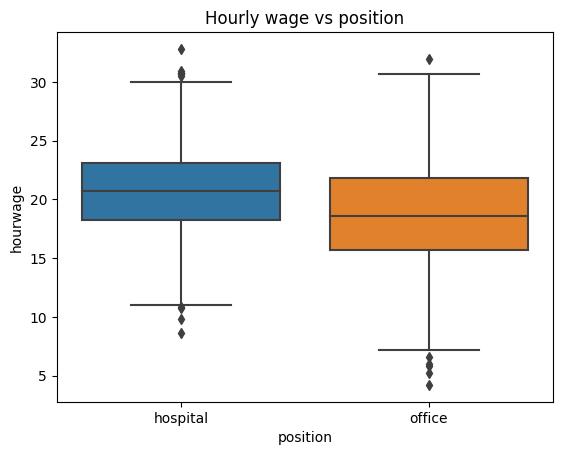

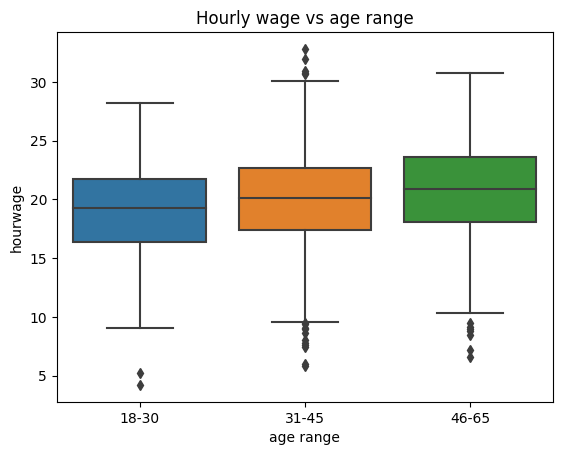

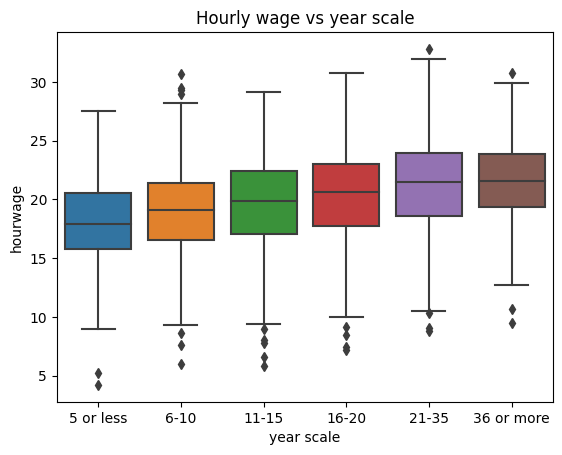

In [823]:
# hourly wage vs position plot
plt.figure()
ax = sns.boxplot(x=df.position, y=df.hourwage)
ax.set_xticklabels(['hospital','office'])
ax.set_xlabel('position')
ax.set_title('Hourly wage vs position')
plt.show()
plt.close()
# hourly wage vs age range plot
plt.figure()
ax1 = sns.boxplot(x=df.agerange, y=df.hourwage)
ax1.set_xticklabels(['18-30','31-45', '46-65'])
ax1.set_xlabel('age range')
ax1.set_title('Hourly wage vs age range')
plt.show()
plt.close()
# hourly wage vs yrsscale plot
plt.figure()
ax2 = sns.boxplot(x=df.yrsscale, y=df.hourwage)
ax2.set_xticklabels(['5 or less','6-10','11-15','16-20','21-35','36 or more'])
ax2.set_xlabel('year scale')
ax2.set_title('Hourly wage vs year scale')
plt.show()
plt.close()

Generate a training and test set, again with an 80:20 split

In [824]:
# assign variables
x = df.drop(['hourwage'], axis=1) # independent
y = df.hourwage # dependent

In [825]:
# generate training and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, shuffle=True)

print ("Training data:",x_train.shape, y_train.shape)
print ("Test data:",x_test.shape, y_test.shape)


Training data: (2328, 3) (2328,)
Test data: (583, 3) (583,)


Investigate whether the distribution of the variables in your test set is representative of the distribution in the training set. For example, find out if the number of nurses who work in the hospital and the office found in the test set are similar, proportion-wise, to those found in the training set.

In [826]:
# distribution of positions in test and training sets
print(f"distribution x_test positions:\n {x_test.groupby('position')['position'].value_counts()/x_test.shape[0]}")
print(f"distribution x_train positions:\n {x_train.groupby('position')['position'].value_counts()/x_train.shape[0]}")

distribution x_test positions:
 position  position
0         0           0.687822
1         1           0.312178
Name: position, dtype: float64
distribution x_train positions:
 position  position
0         0           0.66323
1         1           0.33677
Name: position, dtype: float64


In [827]:
# distribution of years scale in test and training sets
print(f"distribution x_test yrsscale:\n {x_test.groupby('yrsscale')['yrsscale'].value_counts()/x_test.shape[0]}")
print(f"distribution x_train yrs scale:\n {x_train.groupby('yrsscale')['yrsscale'].value_counts()/x_train.shape[0]}")

distribution x_test yrsscale:
 yrsscale  yrsscale
1         1           0.068611
2         2           0.159520
3         3           0.257290
4         4           0.255575
5         5           0.202401
6         6           0.056604
Name: yrsscale, dtype: float64
distribution x_train yrs scale:
 yrsscale  yrsscale
1         1           0.077749
2         2           0.157646
3         3           0.258591
4         4           0.249141
5         5           0.180842
6         6           0.076031
Name: yrsscale, dtype: float64


In [828]:
# distribution of age range in test and training sets
print(f"distribution x_test age range:\n {x_test.groupby('agerange')['agerange'].value_counts()/x_test.shape[0]}")
print(f"distribution x_train age range:\n {x_train.groupby('agerange')['agerange'].value_counts()/x_train.shape[0]}")

distribution x_test age range:
 agerange  agerange
1         1           0.149228
2         2           0.540309
3         3           0.310463
Name: agerange, dtype: float64
distribution x_train age range:
 agerange  agerange
1         1           0.163660
2         2           0.544244
3         3           0.292096
Name: agerange, dtype: float64


The distribution of data in the test and training sets seem to be very close proportion-wise for all x-values (independent variables).

Generate a multiple linear regression model using the training set. Use all the independent variables

In [829]:
# fit a model
lm = LinearRegression()
model = lm.fit(x_train, y_train)

Generate predictions for the test set.

In [830]:
# generate predictions
predictions = lm.predict(x_test)
predictions[0:5]

array([20.36615861, 20.53565828, 19.05360863, 19.92223161, 19.05360863])

Generate an error plot for your predictions

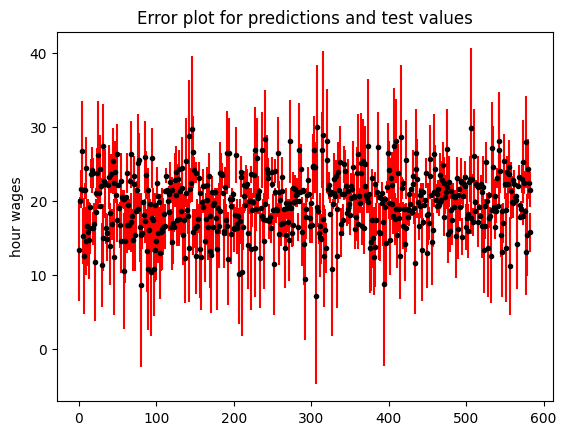

In [831]:
# error plot
plt.errorbar(range(1,584), y_test, yerr=abs(y_test-predictions), fmt='.k', ecolor="red")
plt.title('Error plot for predictions and test values')
plt.ylabel('hour wages')
plt.show()
plt.close()

Compute the Root Mean Squared Error of your model on the test set.

In [832]:
# root mean squared error
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print("The difference between actual and predicted values", rmse)  

The difference between actual and predicted values 3.7109151595653906


Print the coefficients and try to interpret them as we did for the advertisement model.

In [833]:
# prints intercepts and coefficients
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_) # position, age range, years scale

Intercept: 18.39828044336818
Coefficients: [-1.92597665 -0.12759815  0.74102482]


The most influential factor is position as it has a -1.93 coefficient.
Next most influential is years scale, with 0.74.
Lastly, least influential is age range, with -0.13.
Position has the greatest impact on hourly wage, followed by years and lastly age.
Those who work at the hospital tend to have a higher hourly wage than those that work at the office.
The more years one tends to have been in the job the higher the hourly wage will tend to be. The years, however are less important than the position in determining hourly wage.
There is a minor trend that those who are older tend to receive higher hourly wages, but both the position and years in the job are much more influential. There are many outliers in the age range of nurses and their expected hourly wages.